In [4]:
import os
import pandas as pd
import cv2

import os
import json
import ast

import numpy as np
import pandas as pd
import cv2
from scipy.optimize import curve_fit

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report

import tensorflow as tf
from tensorflow.keras import layers, regularizers
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.optimizers import SGD, AdamW

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Flatten, Input
from keras.regularizers import l2
from keras.utils import to_categorical

import keras_tuner as kt

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import zipfile

from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.applications.efficientnet import preprocess_input as pi_efficient
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input as pi_resnet

from tensorflow.keras import layers, models, preprocessing






In [5]:

base_dir = os.getcwd()

train_path = os.path.join(base_dir, "simpsons-mnist-master", "dataset", "rgb", "train")
test_path = os.path.join(base_dir, "simpsons-mnist-master", "dataset", "rgb", "test")
test_rotated_path = os.path.join(base_dir, "simpsons-mnist-master", "dataset", "rgb", "test_rotated")
test_zoomed_in_path = os.path.join(base_dir, "simpsons-mnist-master", "dataset", "rgb", "test_zoomed_in")
test_zoomed_out_path = os.path.join(base_dir, "simpsons-mnist-master", "dataset", "rgb", "test_zoomed_out")

image_data = []
test_data = []
test_r_data = []
test_zi_data = []
test_zo_data = []

for class_name in os.listdir(train_path):

    class_path = os.path.join(train_path, class_name)

    if os.path.isdir(class_path):
        for img_name in os.listdir(class_path):
            image_data.append((os.path.join(class_path, img_name), class_name))

df_train = pd.DataFrame(image_data, columns=["image_path", "label"])
print(df_train.head())

for class_name in os.listdir(test_path):

    class_path = os.path.join(test_path, class_name)

    if os.path.isdir(class_path):
        for img_name in os.listdir(class_path):
            test_data.append((os.path.join(class_path, img_name), class_name))


df_test = pd.DataFrame(test_data, columns=["image_path", "label"])
print(df_test.head())

for class_name in os.listdir(test_rotated_path):

    class_path = os.path.join(test_rotated_path, class_name)

    if os.path.isdir(class_path):
        for img_name in os.listdir(class_path):
            test_r_data.append((os.path.join(class_path, img_name), class_name))

df_test_r = pd.DataFrame(test_r_data, columns=["image_path", "label"])
print(df_test_r.head())

for class_name in os.listdir(test_zoomed_in_path):

    class_path = os.path.join(test_zoomed_in_path, class_name)

    if os.path.isdir(class_path):
        for img_name in os.listdir(class_path):
            test_zi_data.append((os.path.join(class_path, img_name), class_name))

df_test_zi = pd.DataFrame(test_zi_data, columns=["image_path", "label"])
print(df_test_zi.head())

for class_name in os.listdir(test_zoomed_out_path):

    class_path = os.path.join(test_zoomed_out_path, class_name)

    if os.path.isdir(class_path):
        for img_name in os.listdir(class_path):
            test_zo_data.append((os.path.join(class_path, img_name), class_name))

df_test_zo = pd.DataFrame(test_zo_data, columns=["image_path", "label"])
print(df_test_zo.head())


                                          image_path         label
0  c:\Users\Henri\Downloads\Henri\Master HIR\Vakk...  bart_simpson
1  c:\Users\Henri\Downloads\Henri\Master HIR\Vakk...  bart_simpson
2  c:\Users\Henri\Downloads\Henri\Master HIR\Vakk...  bart_simpson
3  c:\Users\Henri\Downloads\Henri\Master HIR\Vakk...  bart_simpson
4  c:\Users\Henri\Downloads\Henri\Master HIR\Vakk...  bart_simpson
                                          image_path         label
0  c:\Users\Henri\Downloads\Henri\Master HIR\Vakk...  bart_simpson
1  c:\Users\Henri\Downloads\Henri\Master HIR\Vakk...  bart_simpson
2  c:\Users\Henri\Downloads\Henri\Master HIR\Vakk...  bart_simpson
3  c:\Users\Henri\Downloads\Henri\Master HIR\Vakk...  bart_simpson
4  c:\Users\Henri\Downloads\Henri\Master HIR\Vakk...  bart_simpson
                                          image_path         label
0  c:\Users\Henri\Downloads\Henri\Master HIR\Vakk...  bart_simpson
1  c:\Users\Henri\Downloads\Henri\Master HIR\Vakk...  bart_sim

In [6]:
def load_image(img_path):
    img = cv2.imread(img_path)
    img = img / 255.0
    return img


df_train["image_array"] = df_train["image_path"].apply(lambda x: load_image(x))

df_test["image_array"] = df_test["image_path"].apply(lambda x: load_image(x))

df_test_r["image_array"] = df_test_r["image_path"].apply(lambda x: load_image(x))

df_test_zi["image_array"] = df_test_zi["image_path"].apply(lambda x: load_image(x))

df_test_zo["image_array"] = df_test_zo["image_path"].apply(lambda x: load_image(x))


sample_img = df_train["image_array"][0]
print(sample_img.shape)

(28, 28, 3)


In [7]:
num_classes = df_train.label.nunique()
print(num_classes)

10


In [8]:






label_encoder = LabelEncoder()
df_train["label_encoded"] = label_encoder.fit_transform(df_train["label"])
df_test["label_encoded"] = label_encoder.transform(df_test["label"])
df_test_r["label_encoded"] = label_encoder.transform(df_test_r["label"])
df_test_zi["label_encoded"] = label_encoder.transform(df_test_zi["label"])
df_test_zo["label_encoded"] = label_encoder.transform(df_test_zo["label"])



X_train_valid = np.stack(df_train["image_array"].values)


y_train_valid = to_categorical(df_train["label_encoded"], num_classes=num_classes)

X_train, X_valid, y_train, y_valid = train_test_split(X_train_valid, y_train_valid, test_size=0.3, random_state=42)

X_test = np.stack(df_test["image_array"].values)
y_test = to_categorical(df_test["label_encoded"], num_classes=num_classes)

X_test_r = np.stack(df_test_r["image_array"].values)
y_test_r = to_categorical(df_test_r["label_encoded"], num_classes=num_classes)

X_test_zi = np.stack(df_test_zi["image_array"].values)
y_test_zi = to_categorical(df_test_zi["label_encoded"], num_classes=num_classes)

X_test_zo = np.stack(df_test_zo["image_array"].values)
y_test_zo = to_categorical(df_test_zo["label_encoded"], num_classes=num_classes)


print(X_train_valid.shape)
print(y_train_valid.shape)



(8000, 28, 28, 3)
(8000, 10)


In [28]:



# Preprocess all images of entire dataset
X_train = pi_resnet(X_train)
X_valid = pi_resnet(X_valid)

X_train_resized = tf.image.resize(X_train, (32, 32))
X_valid_resized = tf.image.resize(X_valid, (32, 32))

# Import ResNet50 for transfer learning
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(32, 32, 3))
base_model.trainable = False  # Freeze base model

In [29]:

input_shape = (32, 32, 3)

data_augmentation = models.Sequential([
    layers.InputLayer(input_shape=input_shape),
    layers.RandomFlip('horizontal'),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
    layers.RandomTranslation(0.1, 0.1),
    #layers.RandomContrast(0.1),
])

custom_cnn = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=input_shape),
    layers.BatchNormalization(),

    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),

    layers.Conv2D(3, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
])


model = models.Sequential([
    data_augmentation,
    custom_cnn,          
    base_model,                 
    layers.GlobalAveragePooling2D(),  
    layers.Dense(512),         
    layers.LeakyReLU(alpha=0.3),  
    layers.Dropout(0.4),        
    layers.Dense(256),        
    layers.LeakyReLU(alpha=0.3),   
    layers.Dropout(0.3),        
    layers.Dense(128),         
    layers.LeakyReLU(alpha=0.3),   
    layers.Dropout(0.2),       
    layers.Dense(num_classes, activation='softmax')  
])




model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])



In [18]:
print(f"X_train_resized shape: {X_train_resized.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_valid_resized shape: {X_valid_resized.shape}")
print(f"y_valid shape: {y_valid.shape}")


X_train_resized shape: (5600, 32, 32, 3)
y_train shape: (5600, 10)
X_valid_resized shape: (2400, 32, 32, 3)
y_valid shape: (2400, 10)


In [ ]:

model.summary()


ValueError: This model has not yet been built. Build the model first by calling `build()` or by calling the model on a batch of data.

In [ ]:
history = model.fit(X_train_resized, y_train, 
                    validation_data=(X_valid_resized, y_valid), 
                    epochs=1000, batch_size=64)

Epoch 1/1000
88/88 [==============================] - 128s 1s/step - loss: 2.4493 - accuracy: 0.0988 - val_loss: 2.3101 - val_accuracy: 0.1004
Epoch 2/1000
88/88 [==============================] - 131s 1s/step - loss: 2.3436 - accuracy: 0.1018 - val_loss: 2.3239 - val_accuracy: 0.1096
Epoch 3/1000
88/88 [==============================] - 125s 1s/step - loss: 2.3389 - accuracy: 0.0979 - val_loss: 2.3158 - val_accuracy: 0.0996
Epoch 4/1000
88/88 [==============================] - 127s 1s/step - loss: 2.3276 - accuracy: 0.1030 - val_loss: 2.3088 - val_accuracy: 0.0983
Epoch 5/1000
88/88 [==============================] - 126s 1s/step - loss: 2.3261 - accuracy: 0.1025 - val_loss: 2.3127 - val_accuracy: 0.1083
Epoch 6/1000
88/88 [==============================] - 123s 1s/step - loss: 2.3191 - accuracy: 0.1046 - val_loss: 2.3064 - val_accuracy: 0.0983
Epoch 7/1000
88/88 [==============================] - 135s 2s/step - loss: 2.3183 - accuracy: 0.1011 - val_loss: 2.3114 - val_accuracy: 0.1004

In [ ]:
model.save("my_model.h5")  # Saves in HDF5 format


c:\Users\Henri\python\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


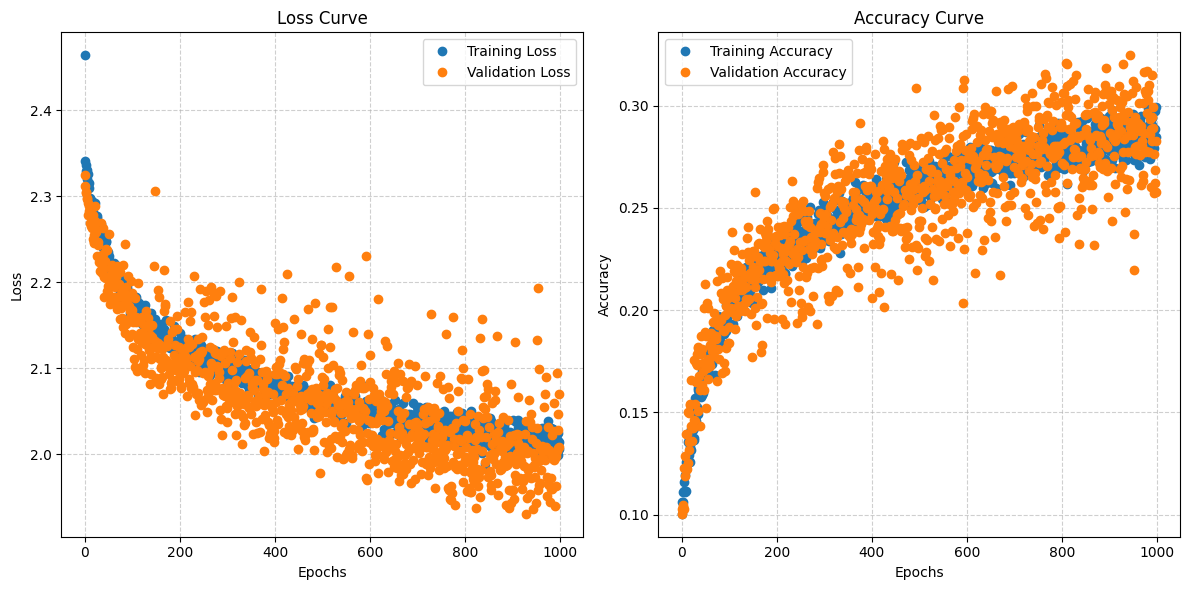

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# Loss
plt.subplot(1, 2, 1)  
plt.plot(history.history['loss'], marker='o', linestyle='none', label='Training Loss')
if 'val_loss' in history.history:  
    plt.plot(history.history['val_loss'], marker='o', linestyle='none', label='Validation Loss')
plt.title('Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)

# Accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], marker='o', linestyle='none', label='Training Accuracy')
if 'val_accuracy' in history.history:  
    plt.plot(history.history['val_accuracy'], marker='o', linestyle='none', label='Validation Accuracy')
plt.title('Accuracy Curve')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()
